# Dataset Breast Cancer

## Decision Tree Classifier

Berikut ini merupakan implementasi algoritma Decision Tree CLassifier menggunakan library scikit-learn.

### Setup Library dan Dataset

In [224]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
503,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,...,30.79,23.87,211.50,2782.0,0.11990,0.3625,0.37940,0.22640,0.2908,0.07277
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.38610,0.19200,0.2909,0.05865
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247
438,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,15.63,28.01,100.90,749.1,0.11180,0.1141,0.04753,0.05890,0.2513,0.06911
440,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,12.36,26.87,90.14,476.4,0.13910,0.4082,0.47790,0.15550,0.2540,0.09532


### Preprocessing and Pipelining

In [225]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Create model

In [226]:
from sklearn import tree
import sklearn.linear_model as lm
# Define model
modelDTL = tree.DecisionTreeClassifier(random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDTL)
                     ])

### Fitting and predict

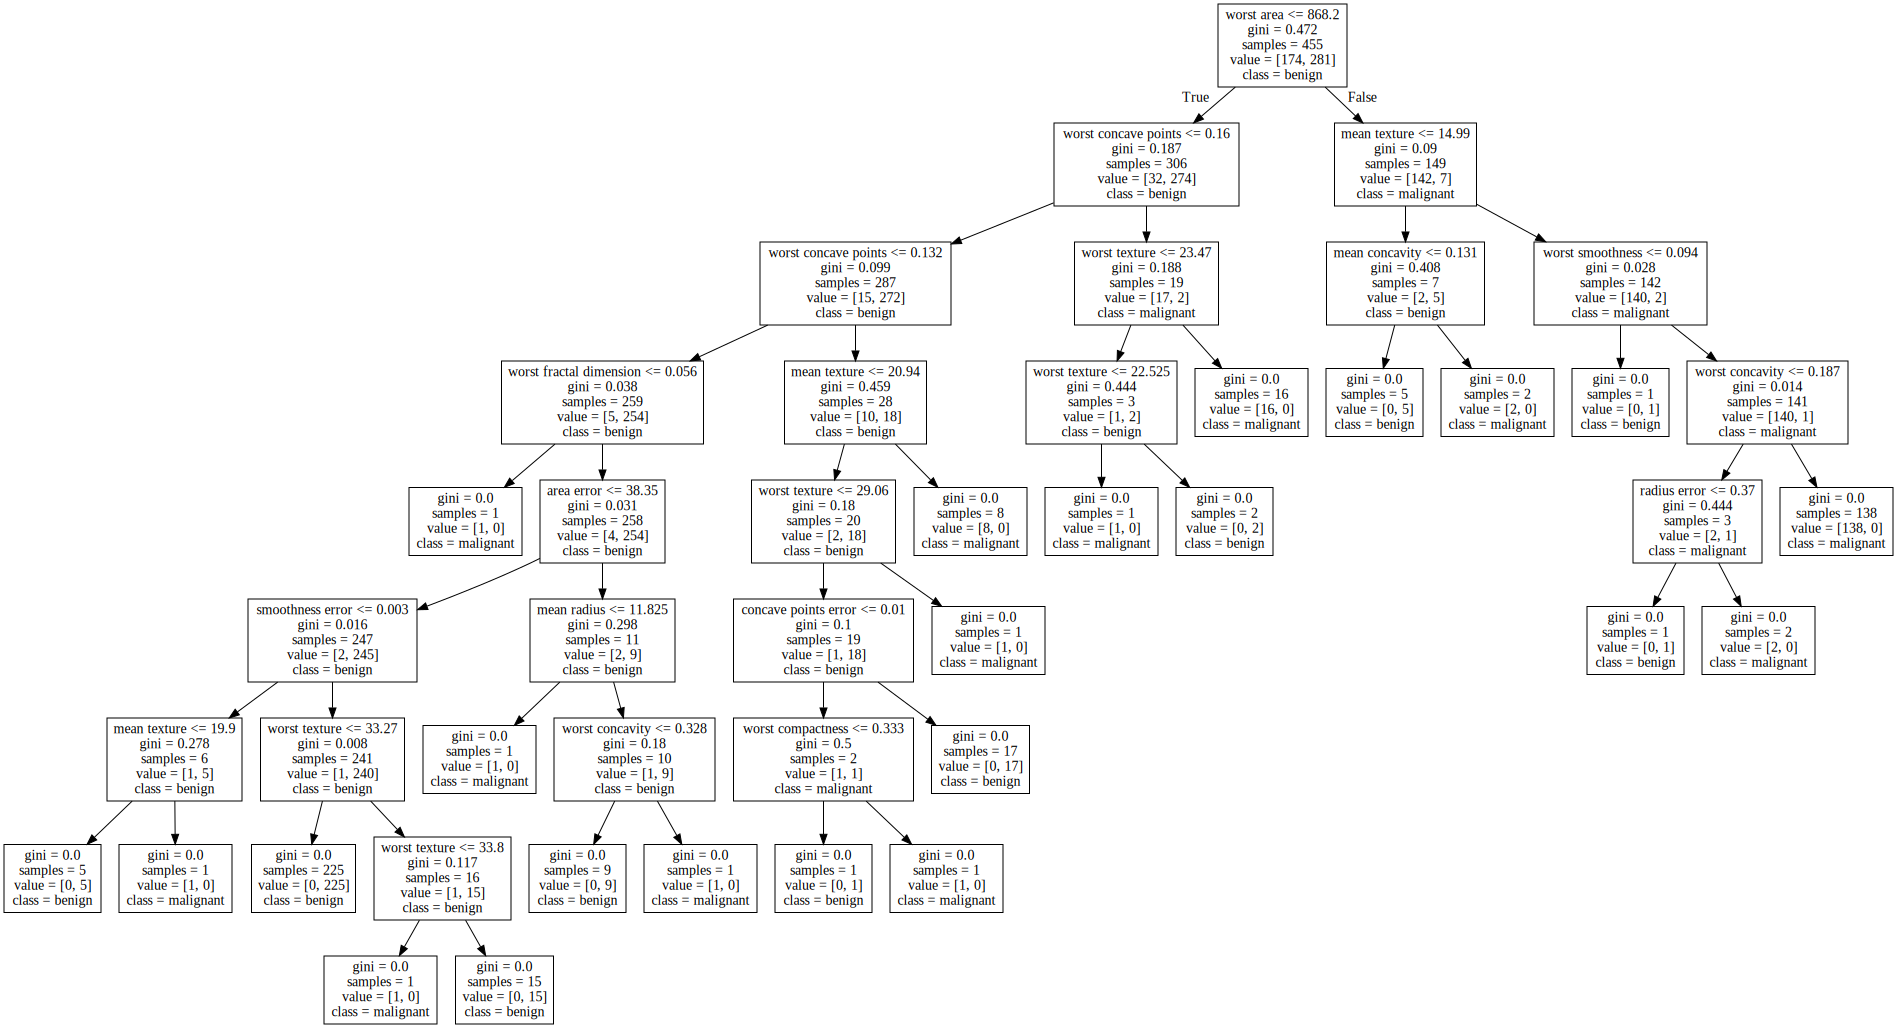

In [227]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_dataDTL = tree.export_graphviz(modelDTL, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graphDTL = graphviz.Source(dot_dataDTL)

# Preprocessing of validation data, get predictions
predsDTL = clf.predict(X_valid_full)

graphDTL

### Accuracy and F1 Score

In [228]:
from sklearn.metrics import accuracy_score, f1_score

accuracyDTL = accuracy_score(y_valid, predsDTL)
f1DTL = f1_score(y_valid, predsDTL)
score_dataDTL = {'accuracy': accuracyDTL, 'f1': f1}
scoreDTL = pd.DataFrame(data = score_dataDTL, index=['score'])
scoreDTL

,accuracy,f1
score,0.947368,0.933333


## ID3 Estimator
Berikut ini merupakan implementasi algoritma ID3 Estimator menggunakan library yang berasal dari github.

### Setup Library dan Dataset

In [229]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.070,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
192,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
160,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,...,13.320,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,16.210,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,16.460,21.75,103.70,840.8,0.10110,0.07087,0.04746,0.05813,0.2530,0.05695


### Create Model

In [230]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

# Define model
modelID3 = Id3Estimator()

### Fitting and predict

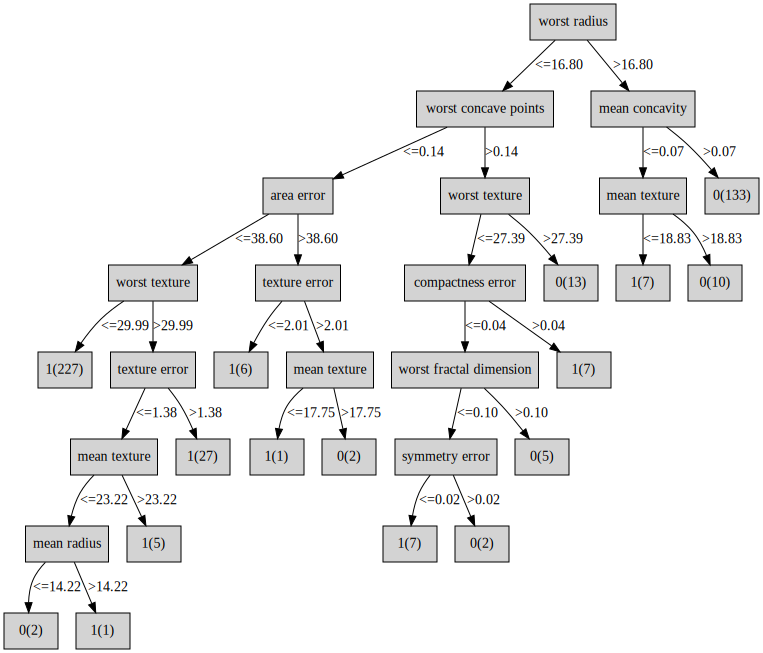

In [231]:
import graphviz
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modelID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=[d for d in data.feature_names], 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modelID3.predict(X_valid_full)

graphID3

### Accuracy and F1 Score

In [232]:
from sklearn.metrics import accuracy_score, f1_score

accuracyID3 = accuracy_score(y_valid, predsID3)
f1ID3 = f1_score(y_valid, predsID3)
score_dataID3 = {'accuracy': accuracyID3, 'f1': f1ID3}
scoreID3 = pd.DataFrame(data = score_dataID3, index=['score'])
scoreID3

,accuracy,f1
score,0.921053,0.932331



## KMeans
Berikut ini merupakan implementasi algoritma KMeans menggunakan library scikit-learn.

### Setup Library dan Dataset

In [233]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2, random_state=0)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


## Create model

In [234]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

### Fitting and predict

In [235]:
kmeans.fit(X_train_full, y_train)

predsKmeans = kmeans.predict(X_valid_full)

### Accuracy and F1 Score

In [236]:
from sklearn.metrics import accuracy_score, f1_score

accuracyKmeans = accuracy_score(y_valid, predsKmeans)
f1Kmeans = f1_score(y_valid, predsKmeans)
score_dataKmeans = {'accuracy': accuracyKmeans, 'f1': f1}
scoreKmeans = pd.DataFrame(data = score_dataKmeans, index=['score'])
scoreKmeans

,accuracy,f1
score,0.184211,0.933333


## Logistic Regression
Berikut ini merupakan implementasi algoritma Logistic Regression menggunakan library scikit-learn.

### Setup Library dan Dataset

In [237]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2, random_state=0)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


### Create model

In [238]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state=0)

### Fitting and predict

In [239]:
modelLogistic.fit(X_train_full, y_train)

predsLogistic = modelLogistic.predict(X_valid_full)

C:\Python 36-64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Accuracy and F1 Score

In [240]:
from sklearn.metrics import accuracy_score, f1_score

accuracyLogistic = accuracy_score(y_valid, predsLogistic)
f1Logistic = f1_score(y_valid, predsLogistic)
score_dataLogistic = {'accuracy': accuracyLogistic, 'f1': f1Logistic}
scoreLogistic = pd.DataFrame(data = score_dataLogistic, index=['score'])
scoreLogistic

,accuracy,f1
score,0.947368,0.954545


## Neural Network
Berikut ini merupakan implementasi algoritma Neural Network menggunakan library scikit-learn.

### Setup Library dan Dataset

In [241]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
224,13.27,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.024560,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.12760,0.13110,0.178600,0.09678,0.2506,0.07623
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418
164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,0.1801,0.05553,...,28.01,28.22,184.20,2403.0,0.12280,0.35830,0.394800,0.23460,0.3589,0.09187
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.11400,0.16670,0.121200,0.05614,0.2637,0.06658


### Create model

In [242]:
from sklearn.neural_network import MLPClassifier

modelNeural = MLPClassifier(random_state=1, max_iter=300)

### Fitting and predict

In [243]:
modelNeural.fit(X_train_full, y_train)
predsNeural = modelNeural.predict(X_valid_full)

### Accuracy and F1 Score

In [244]:
from sklearn.metrics import accuracy_score, f1_score

accuracyNeural = accuracy_score(y_valid, predsNeural)
f1Neural = f1_score(y_valid, predsNeural)
score_dataNeural = {'accuracy': accuracyNeural, 'f1': f1Neural}
scoreNeural = pd.DataFrame(data = score_dataNeural, index=['score'])
scoreNeural

,accuracy,f1
score,0.912281,0.933333


## SVM
Berikut ini merupakan implementasi algoritma SVM (Support Vector Machine) menggunakan library scikit-learn.

### Setup Library dan Dataset

In [245]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
513,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,16.760,17.24,108.50,862.0,0.1223,0.1928,0.24920,0.09186,0.2626,0.07048
362,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.750,25.99,87.82,579.7,0.1298,0.1839,0.12550,0.08312,0.2744,0.07238
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.510,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.53810,0.07879,0.3322,0.14860
383,12.390,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,0.06588,...,14.180,23.13,95.23,600.5,0.1427,0.3593,0.32060,0.09804,0.2819,0.11180


### Create model

In [246]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

### Fitting and predict

In [247]:
modelSVM.fit(X_train_full, y_train)
predsSVM = modelSVM.predict(X_valid_full)

### Accuracy and F1 Score

In [248]:
from sklearn.metrics import accuracy_score, f1_score

accuracySVM = accuracy_score(y_valid, predsSVM)
f1SVM = f1_score(y_valid, predsSVM)
score_dataSVM = {'accuracy': accuracySVM, 'f1': f1SVM}
scoreSVM = pd.DataFrame(data = score_dataSVM, index=['score'])
scoreSVM

,accuracy,f1
score,0.973684,0.980392


## Analisis Accuracy and F1 Score
Analisis Accuracy dan F1 Score dari setiap model yang digunakan

In [249]:
accuracyAll = [accuracyDTL, accuracyID3, accuracyKmeans, accuracyLogistic, accuracyNeural, accuracySVM]
f1All = [f1DTL, f1ID3, f1Kmeans, f1Logistic, f1Neural, f1SVM]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['Decision Tree', 'ID3', 'KMeans', 'Logistic', 'Neural Network', 'SVM'])
allScore

,accuracy,f1
Decision Tree,0.947368,0.960000
ID3,0.921053,0.932331
KMeans,0.184211,0.000000
Logistic,0.947368,0.954545
Neural Network,0.912281,0.933333
SVM,0.973684,0.980392


# Dataset Play Tennis